# Ekhator Uwaila's Notebook
## Machine Learning Midterm

Question 1 (20 points): Design and implement an approach using the power method to determine the first dimension of the PCA transformation (do not use scikit-learn library and SVD decomposition).

Question 2 (20 points): Design and implement an approach to determine the second dimension of the PCA transformation (do not use scikit-learn library and SVD decomposition).

Extra Credit (10 points): Design and implement a gradient approach to determine the first and second dimensions of the PCA transformation by using a gradient optimization approach (compute derivatives). Suggestion to optimize the Lagrange function.

Question 3 (10 points): Describe the benefit of the power method w.r.t. the SVD approach for the PCA transformation.

Question 4 (20 points): By using a binary classifier (logistic regression or SVM) please implement it in Python with the two different procedures (one vs. one, one vs. rest) to handle the problem of more than two different classes (use the iris dataset). Do not use scikit-learn library for the main procedures, but you can use scikit-learn library for the binary logistic regression and SVM. For reference use the following link https://en.wikipedia.org/wiki/Multiclass_classification

Question 5 (20 points): Extensively describe the overfitting and underfitting problem. Use execution examples with decision tree and SVM (with and without kernels and their parameters). You can use the scikit implementations of decision tree and SVM.

Question 6 (10 points): Show examples or situations when the use of kernel procedure is more efficient in terms of training and prediction computational time w.r.t polynomial features transformation.

Question 7 (10 points): Write a procedure to estimate in the SVC classifier (in Scikit) the best kernel (RBF, Polynomial, sigmoid), the best gamma or degree, and the best C. Use the grid search in Scikit without implementing it. Your approach should determine the best parameters.

Use the following reference: https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV https://scikit-learn.org/stable/modules/grid_search.html

Question 8 (10 points): Create examples to explain the properties and the importance of the following kernels: Graph kernel, String kernel, Sigmoid kernel. Search on the web.

### Question 1:

Design and implement an approach using the power method to determine the first dimension of the PCA transformation (do not use scikit-learn library and SVD decomposition).

In [11]:
import numpy as np
#seed for reproducibility
np.random.seed(100)

Note for Power method:<br>
$ X^{(1)} = \frac{AX^{(0)}}{||AX^{(0)}||} $ <br>
Also,<br>
$A = \frac{1}{m} \sum^{m}_{i=1} X^{(i)} (X^{(i)})^{T}$ 
<br>
where A = covariance matrix<br>
$X^{(0)}$ = random initial vector which i represented as 'v' in my code <br>
$ X^{(1)}$ = eigenvector of the matrix A corresponding to its largest eigenvalue, this is v_new in my code

In [35]:
#Function to standardize the data
def my_PCA(X, num_iterations=1000, tolerance=1e-6):
    """Centering the data"""
    centered_data = (X - np.mean(X, axis=0))
    
    """Compute the covariance matrix of X"""
    A = np.cov(centered_data, rowvar=False)
    
    """Apply the power method to find the dominant eigenvector of covariance matrix A"""
    #seed for reproducibility
    np.random.seed(100)
    #random initial vector
    v = np.random.rand(A.shape[1])
    #normalize
    v = v / np.linalg.norm(v)
    
    for _ in range(num_iterations):
        #multiply by covariance matrix A
        v_new = np.dot(A, v)
        #normalize
        v_new = v_new / np.linalg.norm(v_new)
        
        #checking for convergence
        if np.linalg.norm(v - v_new) < tolerance:
            break
        v = v_new
        
    return v_new

In [53]:
#Testing it with Random Numbers
X = np.random.rand(100, 5) 

In [27]:
my_PCA(X)

array([ 0.77730178, -0.03295761, -0.45234777,  0.03784741, -0.43435563])

In [29]:
from sklearn.decomposition import PCA

In [33]:
#using sklearn to test if my_PCA function works well
pc = PCA(n_components=1, random_state=100)
X_PCA = pc.fit(X)


print(f"Number of Principal Components: {pc.n_components}")
print()
print(f"Principal Components (Eigen Vectors): \n {pc.components_}")


Number of Principal Components: 1

Principal Components (Eigen Vectors): 
 [[ 0.77730215 -0.03295748 -0.45234775  0.03783931 -0.43435569]]


### Question 2
Design and implement an approach to determine the second dimension of the PCA transformation (do not use scikit-learn library and SVD decomposition).
<br>

I also utilized the Power method just like in Question 1, the only difference is that I subtracted the components of the data that align with PC1, that is the influence of PC1 on the original data. This makes PC2 to be orthogonal to PC1. This method is known as matrix deflation.<br> [Reference](https://wiki.math.uwaterloo.ca/statwiki/index.php?title=deflation_Methods_for_Sparse_PCA)


In [31]:
#function to find the second PC using Power method
def my_second_PCA(X, num_iterations=1000, tolerance=1e-6):
    """Centering the data"""
    centered_data = (X - np.mean(X, axis=0))
    
    """Compute the covariance matrix of X"""
    A = np.cov(centered_data, rowvar=False)
    
    """Apply the power method to find the dominant eigenvector of covariance matrix A"""
    #seed for reproducibility
    np.random.seed(100)  
    #random initial vector
    v = np.random.rand(A.shape[1])
    #normalize
    v = v / np.linalg.norm(v)
    
    for _ in range(num_iterations):
        #multiplying by covariance matrix A
        v_new = np.dot(A, v)
        #normalize
        v_new = v_new / np.linalg.norm(v_new)
        
        #checking for convergence
        if np.linalg.norm(v - v_new) < tolerance:
            break
        v = v_new
    
    #store the first principal component
    first_pc = v_new
    
    """Remove the influence of the first principal component from the data"""
    X_minus_first_pc = centered_data - centered_data.dot(first_pc.reshape(-1, 1)) * first_pc.reshape(1, -1)
    
    """Compute the covariance matrix of the modified data."""
    A_minus_first_pc = np.cov(X_minus_first_pc, rowvar=False)
    
    """Apply the power method to find the second dominant eigenvector."""
    np.random.seed(200)
    v = np.random.rand(A_minus_first_pc.shape[1])
    v = v / np.linalg.norm(v)
    
    for _ in range(num_iterations):
        v_new = np.dot(A_minus_first_pc, v)
        v_new = v_new / np.linalg.norm(v_new)
        
        
        if np.linalg.norm(v - v_new) < tolerance:
            break
        v = v_new
    
    #return the second pc
    return v_new


In [32]:
my_second_PCA(X)

array([-0.04636812, -0.01684603, -0.00194531,  0.99875341,  0.00735197])

In [34]:
#using sklearn to test if my_second_PCA function works well
pc = PCA(n_components=2, random_state=100)
X_PCA = pc.fit(X)


print(f"Number of Principal Components: {pc.n_components}")
print()
print(f"Principal Components (Eigen Vectors): \n {pc.components_}")


Number of Principal Components: 2

Principal Components (Eigen Vectors): 
 [[ 0.77730215 -0.03295748 -0.45234775  0.03783931 -0.43435569]
 [-0.04636405 -0.01685144 -0.00194779  0.99875356  0.00734359]]


### Question 3:
Describe the benefit of the power method w.r.t. the SVD approach for the PCA transformation.
<br>
References:<br>
[Reference1](https://www.linkedin.com/advice/1/what-pros-cons-using-power-iteration-finding#:~:text=2%20Advantages%20of%20power%20iteration,-Power%20iteration%20has&text=The%20algorithm%20only%20requires%20basic,or%20storage%20for%20intermediate%20results.)<br>
[Reference2](https://medium.com/@shruti.dhumne/singular-value-decomposition-svd-65a2c1ff9967)

- SVD has a high computational complexity especially when dealing with large matrices, because it has to decompose the entire matrix into singular vectors and values. Power Iteration method is advantageous here because it is more computationally efficient, because it does not involve complex decompositions or operations. Therfore it converges faster. Also the power method is an iterative method, unlike the SVD, so we do not need to compute all principal components at once. This makes it faster.

### Question 4:

By using a binary classifier (logistic regression or SVM) please implement it in Python with the two different procedures (one vs. one, one vs. rest) to handle the problem of more than two different classes (use the iris dataset). Do not use scikit-learn library for the main procedures, but you can use scikit-learn library for the binary logistic regression and SVM. For reference use the following link https://en.wikipedia.org/wiki/Multiclass_classification

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [91]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [76]:
def one_vs_rest(X_train, y_train, X_test):
   
    #train classifiers
    
    #create an empty list to stored the trained log regression models(one for each class in the dataset)
    one_vs_rest_clfs = []
    classes = list(np.unique(y_train))
    for i in classes:
        y_train_log = [1 if x == i else 0 for x in y_train]
        logistic = LogisticRegression()
        logistic = logistic.fit(X_train, y_train_log)
        one_vs_rest_clfs.append(logistic)

    #predict
    probabilities = [classifier.predict_proba(X_test)[:, 1] for classifier in one_vs_rest_clfs]
    X_test_pred = np.argmax(probabilities, axis=0)

    return X_test_pred


In [77]:
predicted_ylabels = one_vs_rest(X_train, y_train, X_test)

In [94]:
 #Evaluate predictions
accuracy = accuracy_score(y_test, predicted_ylabels)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [84]:
def one_vs_one(X_train, y_train, X_test):
    #create lists store log regression classifiers and classes
    ovo_classifiers = []
    class_pairs = []
    classes = list(np.unique(y_train))

    #train a classifier for each pair of classes
    for i in classes:
        for j in range(i+1, len(classes)):
            #select data for the current pair of classes
            pair_filter = np.where((y_train == classes[i]) | (y_train == classes[j]))
            X_train_pair = X_train[pair_filter]
            y_train_pair = y_train[pair_filter]

            #adjusting labels for the current binary classification task
            y_train_binary = np.where(y_train_pair == classes[i], 0, 1)
            
            #train the log regression classifier for the current pair
            logistic = LogisticRegression()
            logistic.fit(X_train_pair, y_train_binary)
            ovo_classifiers.append(logistic)
            class_pairs.append((classes[i], classes[j]))

    #prediction using classifiers and vote
    predictions = np.zeros((len(X_test), len(classes)))

    #each classifier votes for its classes
    for classifier, (class1, class2) in zip(ovo_classifiers, class_pairs):
        pred = classifier.predict(X_test)
        for idx, p in enumerate(pred):
            if p == 0:
                predictions[idx, class1] += 1
            else:
                predictions[idx, class2] += 1

    #the class with the most votes is chosen as the prediction
    X_test_pred = np.argmax(predictions, axis=1)

    return X_test_pred


In [85]:
predicted_ylabels2 = one_vs_one(X_train, y_train, X_test)

In [93]:
 #Evaluate predictions
accuracy = accuracy_score(y_test, predicted_ylabels2)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### Question 5:
Extensively describe the overfitting and underfitting problem. Use execution examples with decision tree and SVM (with and without kernels and their parameters). You can use the scikit implementations of decision tree and SVM.

#### Explanation of Overfitting
A model that fits the training data too well is said to be overfitting. When a model learns so much about the detail and noise in the training data that it adversely affects the model's performance on fresh data, this is known as overfitting. This indicates that the model detects and interprets noise or random oscillations in the training set as concepts. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

#### Explanation of Underfitting
A model that is underfit is one that is unable to accurately represent the training set or make inferences from data it has not seen before. A machine learning model that is underfit is unsuitable as it will perform poorly on the training set. Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

[Reference 1](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

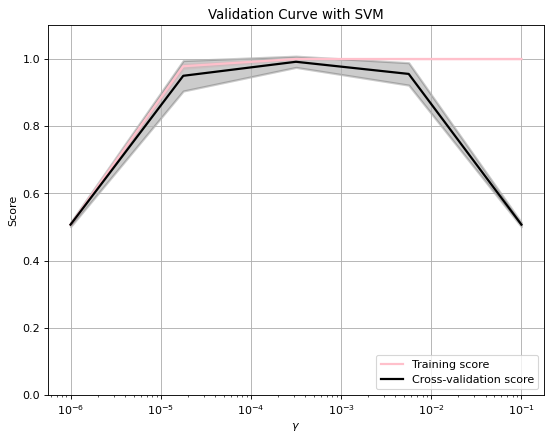

In [101]:
#SVM example showing overfitting and underfitting
X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1, 2])  #binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]


param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(svm.SVC(),X,y,param_name="gamma",
                                             param_range=param_range,
                                             scoring="accuracy",n_jobs=2,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6), dpi=80)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="pink", lw=2)
plt.fill_between(param_range,train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,alpha=0.2,color="pink",lw=2,)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="black", lw=2)
plt.fill_between(param_range,test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,alpha=0.2,color="black",lw=2,)
plt.legend(loc="lower right")
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.show()

The diagram above displays the training and validation scores of a Support Vector Machine (SVM) for different values of the kernel parameter gamma. We can see that both the training and validation scores are low for lower gamma values. This is called underfitting. <br>
Medium gamma values will yield high values for both scores, suggesting that the classifier is performing reasonably well. <br>
Also we can see that the classifier overfits when gamma is very high, because it performs well on training data but poorly on test data.

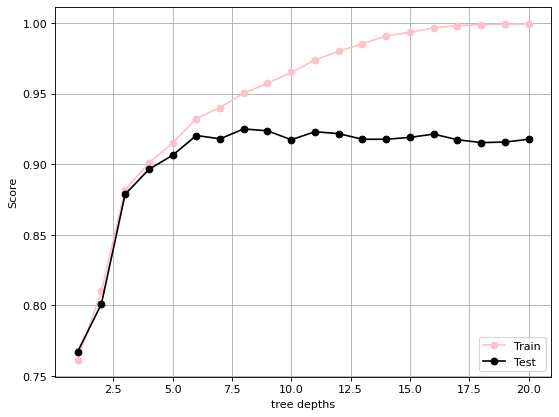

In [100]:
#Decision tree example showing overfitting and underfitting
from sklearn.tree import DecisionTreeClassifier
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)
        train_yhat = model.predict(X_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)
        test_yhat = model.predict(X_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)
                
#plot of train and test scores vs tree depth
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(values, train_scores, '-o',color="pink", label='Train')
plt.plot(values, test_scores, '-o', color="black", label='Test')
plt.xlabel("tree depths")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid()
plt.show()

From the plot above we can see that, when the tree depths goes above 3, the model begins to overfit the training dataset, and performs poorly on the test data. For lower values of tree depth, the training and test scores are low, this is underfitting.

### Question 6: 

Show examples or situations when the use of kernel procedure is more efficient in terms of training and prediction computational time w.r.t polynomial features transformation.

- In cases where the data is high dimensional i.e has many features,using polynomial features transformation can lead to explosion as the data continues to increase, and so this would take more computational time. It is better to use a kernel in this case. Ill illustrate below:

In [73]:
from sklearn.datasets import make_classification

In [74]:
#generate a random classification dataswt
X, y = make_classification(n_samples=50000, n_features=20, 
                                       n_informative=5, n_redundant=15, random_state=100)
#split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
#Using polynomial features transformation
from sklearn.preprocessing import PolynomialFeatures

In [78]:
%%time
#TRAINING

#performing the transformation
trans = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = trans.transform(X_train)
X_test_poly = trans.transform(X_test)

svm_poly_model = svm.SVC()
svm_poly_model.fit(X_train_poly, y_train)

CPU times: user 1min 4s, sys: 261 ms, total: 1min 5s
Wall time: 1min 5s


SVC()

In [80]:
%%time
y_pred = svm_poly_model.predict(X_test_poly)

CPU times: user 14.6 s, sys: 20.5 ms, total: 14.6 s
Wall time: 14.6 s


In [81]:
#accuracy for poly features transformation and SVM
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9546


In [82]:
#Using rbf kernel

In [84]:
%%time
#TRAINING
svm_normal_model = svm.SVC(kernel='rbf')
svm_normal_model.fit(X_train, y_train)

CPU times: user 10 s, sys: 120 ms, total: 10.1 s
Wall time: 10.1 s


SVC()

In [86]:
%%time
#Evaluate
y_pred = svm_normal_model.predict(X_test)

CPU times: user 4.33 s, sys: 12.1 ms, total: 4.34 s
Wall time: 4.34 s


In [87]:
#accuracy for SVM witjout poly transformation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9555


- From the results above we can see that the data that was transformed using polynomial features took a longer time to train and evaluate. In this case where the data has plenty features, the kernal procedure is more efficient in term of computational time.

### Question 7

Write a procedure to estimate in the SVC classifier (in Scikit) the best kernel (RBF, Polynomial, sigmoid), the best gamma or degree, and the best C. Use the grid search in Scikit without implementing it. Your approach should determine the best parameters.

##### Explanation of C and gamma

- C is the regularization parameter, it represents the penalty parameter of the error term. It can be explained as the degree of correct classification that the algorithm has to meet, it controls the tradeoff between correctly classifying datapoints and a smooth decision boundary. A larger C, means the model chooses more data points as support vectors, this may cause the problem of overfitting, and a smaller C may lead to underfitting. We need to choose an optimal C.
- Gamma decides how much curvature we want in a decision boundary, that is how far away should the points be that we consider as support vectors. High gamma means only near points are considered, while Low gamma means far away points are also considered. We need to choose an optimal Gamma.

[Reference](https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/#:~:text=The%20limitation%20of%20SVC%20is,we%20call%20it%20as%20SVM.)

In [67]:
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

parameters = {'kernel':['rbf', 'poly', 'sigmoid'], 
              'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000],  
              'gamma':[0.01, 0.1, 0.5, 1, 10]
             }

svc = svm.SVC()
clf = GridSearchCV(estimator = svc, param_grid = parameters, refit = True, verbose = 0)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 0.5, 1, 10],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [68]:
print("Best parameters:")
clf.best_params_

Best parameters:


{'C': 0.05, 'gamma': 0.1, 'kernel': 'poly'}

In [69]:
print("Best estimator:")
clf.best_estimator_

Best estimator:


SVC(C=0.05, gamma=0.1, kernel='poly')

In [71]:
print("Score of the best estimator:")
clf.best_score_

Score of the best estimator:


0.9866666666666667

The best parameters are C: 0.05, Gamma: 0.1, and Kernel: Polynomial

### Question 8

Create examples to explain the properties and the importance of the following kernels: Graph kernel, String kernel, Sigmoid kernel. Search on the web.

#### Graph Kernel
Graph kernels are used to generalize Support Vector Machines, so they are able to work with graphs. There are different kinds of graph kernels: Random walk kernel, Weisfeiler-Leman graph kernel, shortest path kernel, etc
<br>
##### A general framework on how Graph Kernels work:
For instance we have a collection of graphs that represent various things, and we want to classify these graphs based on what they represent i.e. their labels using an SVM. Because this data is Non-linear we have to convert it into a liner form so we can use SVM, this is were a Graph kernel comes in.
<br>
When we define a kernel function, it would compute the similarity between all pairs of graphs, and store the scores in  Gram matrix aka kernel matrix. $ G_{ij} = \langle \mathbf{x}_i, \mathbf{x}_j \rangle$ where $x_{i} and x_{j} $ represents every pair of graphs.
<br>
Now that we have the Gram matrix, we can apply the SVM. 

[Reference 1](https://towardsdatascience.com/machine-learning-on-graphs-part-3-b968e1cc1aa3)

#### Explaining how a random walk kernel works:
Random walks are performed on a pair of graphs, and then number of matching walks are counted. If we have two node-labeled graphs $G_{i} = (V_{i}, E_{i})$ and $G_{j} = (V_{j}, E_{j})$ , their direct product $G_{x} = (V_{x}, E_{x})$ is a graph with vertex set: <br>
$V_{x}= {(v_{i}, v_{j}) : v_{i} \in V_{i} \land v_{j} \in V_{j} \land l(v_{i}) = l(v_{j})} $ <br>
and edge set:<br>
$E_{x} = {{(v_{i}, v_{j}), (u_{i}, u_{j})} : {v_{i}, u_{i}} \in E_{i}  \land {v_{j}, u_{j}} \in E_{j}}$<br>
Performing a random walk on $G_{x}$ is equivalent to performing a simultaneous random walk on $G_{i}$ and $G_{j}$. The geometric random walk kernel counts common walks (of potentially infinite length) in two graphs.<br>
[Reference 2](https://ysig.github.io/GraKeL/0.1a7/kernels/random_walk.html)
<br> <br>



In [14]:
# pip install graphkit-learn

#### String Kernel

String kernels are used with Support Vector Machines to allow them process strings without having to translate them to fixed-length, real-valued feature vectors. They are used a lot in text mining and gene analysis in computational biology.

##### How it works
The string kernal function works by measuring the similarity of pairs of string, and storing them in $K(a,b)$. The higher the similarity between two strings, the higher the value of $K(a,b)$.
[Reference 1](https://en.wikipedia.org/wiki/String_kernel)
<br><br>
I would illustrate how the String Kernel works using the [Lodhi et al.](https://www.jmlr.org/papers/volume2/lodhi02a/lodhi02a.pdf) sting kernal. <br>
[Reference 2](https://github.com/weekend37/string-kernels/blob/master/example.ipynb)

##### How the Lodhi String Kernel works
The way it works is that if given two text documents, it compares them by means of the substrings they contain. The more substrings in commons, the higher the similarity level.  They also introduced a decay factor $\lambda \in (0,1)$ to handle non-contiguous substrings. This sub-strings do not have to be necessarily contiguous, but the level of contiguity in a sub-string in a document will determine the amount of weight it will have in the comparison. For instance: the sub-string ‘c-a-r’ appears in both ‘card’ and ‘custard’, but with different weighting.

Please find the code illustration below:

In [20]:
# pip install string-kernels --upgrade

In [19]:
# !pip install matplotlib
# !pip install scikit-learn

In [2]:
#Accessing Lodhi's string kernel
from sklearn import svm
from stringkernels.kernels import string_kernel
model = svm.SVC(kernel=string_kernel())

In [15]:
#Loading the data
samples_train = np.load('samples_train.npy')
samples_validation = np.load('samples_validation.npy')
ancestry_train = np.load('ancestry_train.npy')
ancestry_validation = np.load('ancestry_validation.npy')
reference = np.load('reference.npy')
populations = np.load('populations.npy')

In [38]:
from stringkernels.utils import load_sample_data
#data = load_sample_data()

samples_train = np.load('samples_train.npy')
samples_validation = np.load('samples_validation.npy')
ancestry_train = np.load('ancestry_train.npy')
ancestry_validation = np.load('ancestry_validation.npy')
reference = np.load('reference.npy')
populations = np.load('populations.npy')

print("number of training samples:", len(samples_train))
print("number of validation samples:", len(samples_validation))
print("Sequence length:", len(reference))
print("Number of ancestries:", len(populations))

number of training samples: 552
number of validation samples: 120
Sequence length: 1000
Number of ancestries: 6


In [39]:
#Converting to binary using reference file
X_train = (samples_train != reference).astype(int)

#Encoding each ancestry by a number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ancestry_train)
y_train = le.transform(ancestry_train)
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [40]:
#Repeating the steps for the validation data
X_val = (samples_validation != reference).astype(int)
y_val = le.transform(ancestry_validation)

In [41]:
#Using a regular SVM on the data
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy: {}%".format(np.round(svm_accuracy*100, 2)))

Validation Accuracy: 59.17%


In [42]:
#Using the string kernel from Lodhi
from stringkernels.kernels import string_kernel

svm_sk_model = svm.SVC(kernel=string_kernel())
svm_sk_model.fit(X_train, y_train)
y_pred = svm_sk_model.predict(X_val)
svm_sk_accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy: {}%".format(np.round(svm_sk_accuracy*100, 2)))

Validation Accuracy: 69.17%


From the above, the stringkernal improved the SVMs performance on the gene sequences data.

#### Sigmoid Kernel

The function sigmoid_kernel computes the sigmoid kernel between two vectors. The sigmoid kernel is also known as hyperbolic tangent, or Multilayer Perceptron (because, in the neural network field, it is often used as neuron activation function). <br>
The sigmoid kernel can model non-linear and sigmoidal relationships between the data points, and it can approximate the neural network activation function. It’s particularly suited for problems where the decision boundary is expected to be S-shaped or take on a sigmoidal form.
It works by taking your input, mapping them to a value of 0 and 1 so that they can be separated by a simple straight line.

It is defined as:

$k(x,y) = tanh(\gamma x^{T}y + c_{0})$
<br>
where: <br>
x, y are the input vectors <br>
$\gamma $ is known as slope <br>
$c_{0}$ is known as intercept, It is the central vertical bias that changes the height of the kernel’s output for inputs near the origin. It shifts the operating point on the sigmoid, affecting the relative emphasis of the angle between the inputs.<br>
tanh is the hyperbolic tangent function<br>

Assuming we have two feature vectors $x = \begin{bmatrix} x_1\\ x_2\\.\\.\\.\\x_n \end{bmatrix}$ and $y = \begin{bmatrix} y_1\\y_2\\.\\.\\.\\y_n \end{bmatrix}$
<br>

Then $x^{T}y = \begin{bmatrix} x_1&x_2&.&.&.&x_n \end{bmatrix}\begin{bmatrix} y_1\\y_2\\.\\.\\.\\y_n \end{bmatrix}$


The parameters '$\gamma $' and '$c_{0}$' are pivotal and need careful tuning to ensure model accuracy, finding the right values for these parameters can be a challenge. Another thing to note is that sigmoid kernel usually works better for binary classifications than multiclass.

[Reference 1](https://scikit-learn.org/stable/modules/metrics.html#sigmoid-kernel)<br>
[Reference 2](https://www.linkedin.com/advice/0/what-best-kernel-functions-support-vector-machine-13hme#:~:text=The%20sigmoid%20kernel%20can%20model,have%20discrete%20and%20logical%20values.)<br>
[Reference 3](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)<br>


In [51]:
import pandas as pd
from sklearn.metrics import classification_report

In [58]:
from sklearn import datasets 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
sepal_length = iris.data[:,0] 
sepal_width = iris.data[:,1]

# Train sigmoid SVM classifier
clf = SVC(kernel='sigmoid', gamma='auto') 
clf.fit(np.c_[sepal_length, sepal_width], iris.target) 

# Make predictions
predictions = clf.predict(np.c_[sepal_length, sepal_width])

#assessing perfomance of sigmoid SVM 
accuracy = accuracy_score(iris.target, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333


The Sigmoid kernel performs very poorly on the iris data set above, this is because the iris dataset contains values that are outside the range of 0 and 1. The Sigmoid kernel performs better when the values are scaled as shown below:<br>
[Reference 4](https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c)

In [62]:
sepal_length = iris.data[:,0] 
sepal_width = iris.data[:,1]

#normalizing features
from sklearn.preprocessing import normalize 
sepal_length_norm = normalize(sepal_length.reshape(1, -1))[0] 
sepal_width_norm = normalize(sepal_width.reshape(1, -1))[0] 

# Train sigmoid SVM classifier
clf = SVC(kernel='sigmoid', gamma='auto') 
clf.fit(np.c_[sepal_length_norm, sepal_width_norm], iris.target) 


# Make predictions
pr_norm=clf.predict(np.c_[sepal_length_norm, sepal_width_norm])

#assessing perfomance of sigmoid SVM with normalized features
accuracy = accuracy_score(iris.target, pr_norm)
print("Accuracy:", accuracy)
#pd.DataFrame(classification_report(iris.target, pr_norm, output_dict=True))



Accuracy: 0.7666666666666667


---------------------------------------END--------------------------------------------------------

In [12]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define the graph dataset
# graphs = {
#     'triangle': np.array([[0, 1, 1],
#                            [1, 0, 1],
#                            [1, 1, 0]]),
#     'square': np.array([[1, 1, 1],
#                         [1, 1, 1],
#                         [1, 1, 1]]),
#     'circle': np.array([[0, 1, 0],
#                         [1, 1, 1],
#                         [0, 1, 0]])
# }

# # Define labels for the graphs
# labels = {'triangle': 0, 'square': 1, 'circle': 2}

# # Scenario 1: Without Kernel
# X_train_without_kernel = np.array([graph.flatten() for graph in graphs.values()])
# y_train_without_kernel = [labels[key] for key in graphs.keys()]
# svm_classifier_without_kernel = SVC(kernel='linear')
# svm_classifier_without_kernel.fit(X_train_without_kernel, y_train_without_kernel)

# # Scenario 2: With Kernel (using graph_kernel function)
# def graph_kernel(graph1, graph2):
#     return np.sum(graph1 == graph2)

# # Compute the Gram matrix
# n_graphs = len(graphs)
# gram_matrix = np.zeros((n_graphs, n_graphs))
# for i in range(n_graphs):
#     for j in range(n_graphs):
#         gram_matrix[i, j] = graph_kernel(graphs[list(graphs.keys())[i]], graphs[list(graphs.keys())[j]])

# # Train SVM classifier using the Gram matrix
# svm_classifier_with_kernel = SVC(kernel='precomputed')
# svm_classifier_with_kernel.fit(gram_matrix, y_train_without_kernel)

# # Evaluate accuracy scores
# accuracy_without_kernel = accuracy_score(y_train_without_kernel, svm_classifier_without_kernel.predict(X_train_without_kernel))
# accuracy_with_kernel = accuracy_score(y_train_without_kernel, svm_classifier_with_kernel.predict(gram_matrix))

# # Output the accuracy scores
# print("Accuracy without kernel:", accuracy_without_kernel)
# print("Accuracy with kernel:", accuracy_with_kernel)
